In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class UniformDistribution:
    def __init__(self, num_states=1000, num_actions=2, B=3, epoch=10, log_interval=50, do=False):
        self.gamma = 1
        self.epsilon = 0.1
        self.prob_terminal = 0.1

        self.num_states = num_states
        self.num_actions = num_actions
        self.B = B
        self.epoch = epoch
        self.log_interval = log_interval

        self.log = []

        if do:
            self.do()

    def step(self, state, action):
        if np.random.rand() < self.prob_terminal:
            return 0, 0, True
        
        random_b = np.random.randint(0, self.B)
        next_state = self.trans_ns[state, action, random_b]
        reward = self.trans_r[state, action, random_b]

        return next_state, reward, False
    
    def calculate_Vs0(self, Q):
        N = 200
        total_reward = np.zeros(N)

        for n in range(N):
            state = 0
            done = False
            while not done:
                action_table = np.where(Q[state] == np.max(Q[state]))[0]
                action = np.random.choice(action_table)
                state, reward, done = self.step(state, action)
                total_reward[n] += reward
                
        return np.mean(total_reward)

    
    def do(self):
        N = 10
        self.log = [[] for _ in range(self.epoch)]

        for e in range(self.epoch):
            t = 0
            Q = np.zeros((self.num_states, self.num_actions))

            self.trans_ns = np.random.randint(0, self.num_states, (self.num_states, self.num_actions, self.B))
            self.trans_r = np.random.normal(0, 1, (self.num_states, self.num_actions, self.B))
            
            for n in range(N * self.num_states * self.num_actions):
                s = np.random.randint(0, self.num_states)
                a = np.random.randint(0, self.num_actions)
                
                r = np.sum(self.trans_r[s, a])
                ns = np.sum(np.max(Q[self.trans_ns[s, a]], axis=1))
                Q[s, a] = (1 - self.prob_terminal) * (r + self.gamma * ns) / self.B

                if t % self.log_interval == 0:
                    self.log[e].append(self.calculate_Vs0(Q))
                t += 1

        self.log = np.array(self.log)

In [13]:
class OnPolicy:
    def __init__(self, num_states=1000, num_actions=2, B=3, epoch=10, log_interval=50, do=False):
        self.gamma = 1
        self.epsilon = 0.1
        self.prob_terminal = 0.1

        self.num_states = num_states
        self.num_actions = num_actions
        self.B = B
        self.epoch = epoch
        self.log_interval = log_interval

        self.log = []

        if do:
            self.do()

    def step(self, state, action):
        if np.random.rand() < self.prob_terminal:
            return 0, 0, True
        
        random_b = np.random.randint(0, self.B)
        next_state = self.trans_ns[state, action, random_b]
        reward = self.trans_r[state, action, random_b]

        return next_state, reward, False
    
    def calculate_Vs0(self, Q):
        N = 200
        total_reward = np.zeros(N)

        for n in range(N):
            state = 0
            done = False
            while not done:
                action_table = np.where(Q[state] == np.max(Q[state]))[0]
                action = np.random.choice(action_table)
                state, reward, done = self.step(state, action)
                total_reward[n] += reward
                
        return np.mean(total_reward)
    
    def select_action(self, Q):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.num_actions)
        else:
            return np.random.choice(np.where(Q == np.max(Q))[0])

    def do(self):
        N = 10
        self.log = [[] for _ in range(self.epoch)]

        for e in range(self.epoch):
            t = 0
            s = 0
            Q = np.zeros((self.num_states, self.num_actions))

            self.trans_ns = np.random.randint(0, self.num_states, (self.num_states, self.num_actions, self.B))
            self.trans_r = np.random.normal(0, 1, (self.num_states, self.num_actions, self.B))

            for n in range(N * self.num_states * self.num_actions):
                a = self.select_action(Q[s])
                ns, r, done = self.step(s, a)                
                
                r = np.sum(self.trans_r[s, a])
                ns_ = np.sum(np.max(Q[self.trans_ns[s, a]], axis=1))
                Q[s, a] = (1 - self.prob_terminal) * (r + self.gamma * ns_) / self.B

                if t % self.log_interval == 0:
                    self.log[e].append(self.calculate_Vs0(Q))
                t += 1

                if done:
                    s = 0
                s = ns

        self.log = np.array(self.log)

In [16]:
u1 = UniformDistribution(B=1, do=True, log_interval=100, epoch=20)
u2 = UniformDistribution(B=3, do=True, log_interval=100, epoch=20)
u3 = UniformDistribution(B=10, do=True, log_interval=100, epoch=20)

o1 = OnPolicy(B=1, do=True, log_interval=100, epoch=20)
o2 = OnPolicy(B=3, do=True, log_interval=100, epoch=20)
o3 = OnPolicy(B=10, do=True, log_interval=100, epoch=20)

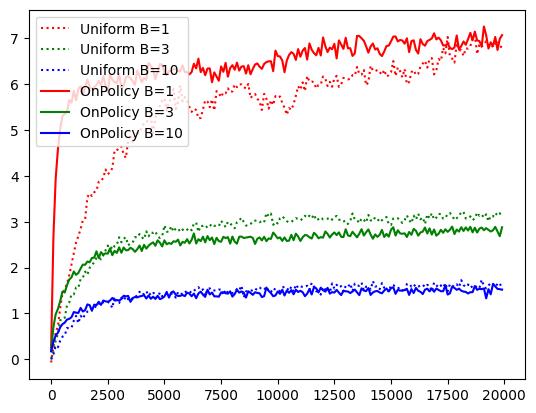

In [18]:
plt.plot(range(0, 20000, 100), np.mean(u1.log, axis=0), 'r:', label='Uniform B=1')
plt.plot(range(0, 20000, 100), np.mean(u2.log, axis=0), 'g:', label='Uniform B=3')
plt.plot(range(0, 20000, 100), np.mean(u3.log, axis=0), 'b:', label='Uniform B=10')

plt.plot(range(0, 20000, 100), np.mean(o1.log, axis=0), 'r', label='OnPolicy B=1')
plt.plot(range(0, 20000, 100), np.mean(o2.log, axis=0), 'g', label='OnPolicy B=3')
plt.plot(range(0, 20000, 100), np.mean(o3.log, axis=0), 'b', label='OnPolicy B=10')

plt.xl
plt.ylabel('Initial state value')

plt.legend()
plt.show()

In [19]:
u4 = UniformDistribution(num_states=10000, B=1, do=True, log_interval=1000, epoch=20)
u5 = UniformDistribution(num_states=10000, B=3, do=True, log_interval=1000, epoch=20)

o4 = OnPolicy(num_states=10000, B=1, do=True, log_interval=1000, epoch=20)
o5 = OnPolicy(num_states=10000, B=3, do=True, log_interval=1000, epoch=20)

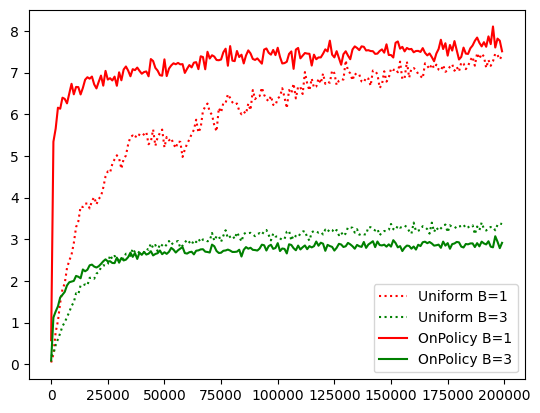

In [20]:
plt.plot(range(0, 200000, 1000), np.mean(u4.log, axis=0), 'r:', label='Uniform B=1')
plt.plot(range(0, 200000, 1000), np.mean(u5.log, axis=0), 'g:', label='Uniform B=3')

plt.plot(range(0, 200000, 1000), np.mean(o4.log, axis=0), 'r', label='OnPolicy B=1')
plt.plot(range(0, 200000, 1000), np.mean(o5.log, axis=0), 'g', label='OnPolicy B=3')

plt.legend()
plt.show()